In [1]:
import pandas as pd
import urllib
import os, shutil
import numpy as np
from keras import layers, models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications import DenseNet121

Using TensorFlow backend.


In [2]:
train = pd.read_csv('data/myntra_train_dataset.csv')
train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
1,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
2,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Biker
3,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic
4,Roadster,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/182...,Graphic


In [3]:
test = pd.read_csv('data/myntra_test.csv')
test.head()

,Brand,Category,Gender,Color,Link_to_the_image
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...


In [4]:
sub = pd.read_csv('data/Submission_online.csv')
sub.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [5]:
print(train.shape)
print(test.shape)
print(sub.shape)

(70000, 6)
(15000, 5)
(15000, 6)


In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

Brand                   0
Category                0
Gender                  0
Color                 323
Link_to_the_image    1130
Sub_category            0
dtype: int64
Brand                  0
Category               0
Gender                 0
Color                 25
Link_to_the_image    230
dtype: int64


In [7]:
train.dropna(axis=0,how='any',inplace=True)

In [8]:
print(len(train.Color.unique()),' unique colour Tshirts in train')
print(len(test.Color.unique()),' unique colour Tshirts in train\n')
print(len(train.Sub_category.unique()),' unique Sub categories in train\n')
print(len(train.Gender.unique()),' unique gender in both train and test')

44  unique colour Tshirts in train
39  unique colour Tshirts in train

24  unique Sub categories in train

5  unique gender in both train and test


In [9]:
indexes = list()
for g in train.Gender.unique().tolist():
    for c in train.Color.unique().tolist():
        for sc in train.Sub_category.unique().tolist():
            subset_df = train[(train.Gender==g)&(train.Color==c)&(train.Sub_category==sc)]
            if len(subset_df) > 10:
                indexes += subset_df.sample(n=10, random_state=0).index.values.tolist()
            else:
                indexes += subset_df.index.values.tolist()

In [10]:
indexes[:5]

[50859, 45052, 30157, 8212, 50786]

In [11]:
subset_train = train.loc[indexes]
subset_train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
50859,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/233...,Graphic
45052,Jack & Jones,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/160...,Graphic
30157,Marvel Avengers,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/220...,Graphic
8212,Puma,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/218...,Graphic
50786,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/235...,Graphic


#### Downloading the training images set

In [12]:
'''

count = 1
for i, row in subset_train.iterrows():
    try:
        resource = urllib.request.urlopen(row['Link_to_the_image'])
        output = open(str(i)+'.jpg',"wb")
        output.write(resource.read())
        output.close()
        print(count,'/',len(subset_train))
        count += 1
    except:
        print(row)
'''

######################################################################



'\n\ncount = 1\nfor i, row in subset_train[4239:].iterrows():\n    try:\n        resource = urllib.request.urlopen(row[\'Link_to_the_image\'])\n        output = open(str(i)+\'.jpg\',"wb")\n        output.write(resource.read())\n        output.close()\n        print(count,\'/\',len(subset_train))\n        count += 1\n    except:\n        print(row)\n'

### Subset train temporary

In [8]:
subset_train = pd.read_csv('subset_train.csv')
subset_train.set_index('Unnamed: 0', inplace=True)
subset_train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
Unnamed: 0,,,,,,
50859,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/233...,Graphic
45052,Jack & Jones,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/160...,Graphic
30157,Marvel Avengers,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/220...,Graphic
8212,Puma,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/218...,Graphic
50786,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/235...,Graphic


In [9]:
print(subset_train.shape)
not_available = list()
corrupt_file = list()

for i, row  in subset_train.iterrows():
    fname = str('train_images/') + str(i) + '.jpg'
    if not os.path.isfile(fname):
        not_available.append(i)
        
print('List of indexes not available :',not_available)

for i, row  in subset_train.iterrows():
    fname = str('train_images/') + str(i) + '.jpg'
    try:
        img = Image.open(fname)
    except IOError:
        corrupt_file.append(i)

print('List of corrupt file :',corrupt_file)

(10485, 6)
List of indexes not available : []
List of corrupt file : [68095, 51510]


In [10]:
subset_train.drop(corrupt_file, axis=0, inplace=True)
subset_train.shape  

(10483, 6)

In [11]:
subset_train.drop(not_available, axis=0, inplace=True)
subset_train.shape

(10483, 6)

In [12]:
subset_train.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
Unnamed: 0,,,,,,
50859,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/233...,Graphic
45052,Jack & Jones,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/160...,Graphic
30157,Marvel Avengers,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/220...,Graphic
8212,Puma,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/218...,Graphic
50786,Huetrap,Tshirts,Men,Black,http://myntra.myntassets.com/assets/images/235...,Graphic


In [15]:
categories = subset_train.Sub_category.unique().tolist()
len(categories)

24

In [16]:
original_dataset_dir = 'training/'

train_set = os.path.join(original_dataset_dir,'train_set')
if not os.path.exists(train_set):
    os.mkdir(train_set)

val_set = os.path.join(original_dataset_dir,'val_set')
if not os.path.exists(val_set):
    os.mkdir(val_set)

test_set = os.path.join(original_dataset_dir,'test_set')
if not os.path.exists(test_set):
    os.mkdir(test_set)

for cat in categories:
    print(cat)
    
    temp = subset_train[subset_train['Sub_category']==cat]
    
    cat_dir_train = os.path.join(train_set,cat)
    
    if not os.path.exists(cat_dir_train):
        os.mkdir(cat_dir_train)
    
    cat_dir_val = os.path.join(val_set,cat)
    
    if not os.path.exists(cat_dir_val):
        os.mkdir(cat_dir_val)
    
    train_part = temp[:int(0.6*(len(temp)))]
    val_part = temp[int(0.6*(len(temp))):int(0.8*(len(temp)))]
    test_part = temp[int(0.8*(len(temp))):]
    
    for i, row  in train_part.iterrows():
        file_dir = str('train_images/') + str(i) + '.jpg'
        shutil.copy(file_dir,cat_dir_train)
    
    for i, row  in val_part.iterrows():
        file_dir = str('train_images/') + str(i) + '.jpg'
        shutil.copy(file_dir,cat_dir_val)
        
    for i, row  in test_part.iterrows():
        file_dir = str('train_images/') + str(i) + '.jpg'
        shutil.copy(file_dir,test_set)
        
    if len(temp)<5:
        for i, row  in temp.iterrows():
            file_dir = str('train_images/') + str(i) + '.jpg'
            shutil.copy(file_dir,cat_dir_train)
            shutil.copy(file_dir,cat_dir_val)
            shutil.copy(file_dir,test_set)
        

Graphic
Biker
Striped
Colourblocked
Tie and Dye
Solid
Typography
Geometric
Camouflage
Abstract
Tribal
People and Places
Conversational
Sports
Floral
Humour and Comic
Music
Checked
Self Design
Varsity
Sports and Team Jersey
Polka Dots
Superhero
Horizontal Stripes


In [17]:
conv_base = DenseNet121(include_top=False, weights='imagenet', input_shape=(240,320, 3))
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 246, 326, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 120, 160, 64) 9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 120, 160, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

__________________________________________________________________________________________________
conv3_block9_0_relu (Activation (None, 30, 40, 384)  0           conv3_block9_0_bn[0][0]          
__________________________________________________________________________________________________
conv3_block9_1_conv (Conv2D)    (None, 30, 40, 128)  49152       conv3_block9_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block9_1_bn (BatchNormali (None, 30, 40, 128)  512         conv3_block9_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block9_1_relu (Activation (None, 30, 40, 128)  0           conv3_block9_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block9_2_conv (Conv2D)    (None, 30, 40, 32)   36864       conv3_block9_1_relu[0][0]        
__________

In [20]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count, label_types):
    print(directory)
    features = np.zeros(shape=(sample_count,7,10,1024),dtype=np.float32)
    labels = np.zeros(shape=(sample_count, label_types),dtype=np.float32)
    generator = datagen.flow_from_directory(
                        directory,
                        target_size=(240,320),
                        batch_size=batch_size,
                        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i * batch_size, sample_count)
        if i * batch_size >= sample_count:
            break
    return features, labels


In [21]:
train_features, train_labels = extract_features(train_set, 6282, 24)
train_features = np.reshape(train_features, (6282, 7*10*1024))
np.save('train_features_DenseNet121', train_features)
np.save('train_labels_DenseNet121', train_labels)

training/train_set
Found 6282 images belonging to 24 classes.
20 6282
40 6282
60 6282
80 6282
100 6282
120 6282
140 6282
160 6282
180 6282
200 6282
220 6282
240 6282
260 6282
280 6282
300 6282
320 6282
340 6282
360 6282
380 6282
400 6282
420 6282
440 6282
460 6282
480 6282
500 6282
520 6282
540 6282
560 6282
580 6282
600 6282
620 6282
640 6282
660 6282
680 6282
700 6282
720 6282
740 6282
760 6282
780 6282
800 6282
820 6282
840 6282
860 6282
880 6282
900 6282
920 6282
940 6282
960 6282
980 6282
1000 6282
1020 6282
1040 6282
1060 6282
1080 6282
1100 6282
1120 6282
1140 6282
1160 6282
1180 6282
1200 6282
1220 6282
1240 6282
1260 6282
1280 6282
1300 6282
1320 6282
1340 6282
1360 6282
1380 6282
1400 6282
1420 6282
1440 6282
1460 6282
1480 6282
1500 6282
1520 6282
1540 6282
1560 6282
1580 6282
1600 6282
1620 6282
1640 6282
1660 6282
1680 6282
1700 6282
1720 6282
1740 6282
1760 6282
1780 6282
1800 6282
1820 6282
1840 6282
1860 6282
1880 6282
1900 6282
1920 6282
1940 6282
1960 6282
1980 6282
2

In [22]:
validation_features, validation_labels = extract_features(val_set, 2098, 24)
validation_features = np.reshape(validation_features, (2098, 7*10*1024))
np.save('validation_features_DenseNet121', validation_features)
np.save('validation_labels_DenseNet121', validation_labels)

training/val_set
Found 2098 images belonging to 24 classes.
20 2098
40 2098
60 2098
80 2098
100 2098
120 2098
140 2098
160 2098
180 2098
200 2098
220 2098
240 2098
260 2098
280 2098
300 2098
320 2098
340 2098
360 2098
380 2098
400 2098
420 2098
440 2098
460 2098
480 2098
500 2098
520 2098
540 2098
560 2098
580 2098
600 2098
620 2098
640 2098
660 2098
680 2098
700 2098
720 2098
740 2098
760 2098
780 2098
800 2098
820 2098
840 2098
860 2098
880 2098
900 2098
920 2098
940 2098
960 2098
980 2098
1000 2098
1020 2098
1040 2098
1060 2098
1080 2098
1100 2098
1120 2098
1140 2098
1160 2098
1180 2098
1200 2098
1220 2098
1240 2098
1260 2098
1280 2098
1300 2098
1320 2098
1340 2098
1360 2098
1380 2098
1400 2098
1420 2098
1440 2098
1460 2098
1480 2098
1500 2098
1520 2098
1540 2098
1560 2098
1580 2098
1600 2098
1620 2098
1640 2098
1660 2098
1680 2098
1700 2098
1720 2098
1740 2098
1760 2098
1780 2098
1800 2098
1820 2098
1840 2098
1860 2098
1880 2098
1900 2098
1920 2098
1940 2098
1960 2098
1980 2098
200

In [34]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 10 * 1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(24, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])

In [35]:
history = model.fit(
        train_features,
        train_labels,
        epochs=20,
        validation_data=(validation_features,validation_labels))

Train on 6282 samples, validate on 2098 samples
Epoch 1/20
6282/6282 [==============================] - 227s 36ms/step - loss: 2.8172 - acc: 0.2179 - val_loss: 2.9392 - val_acc: 0.2202
Epoch 2/20
6282/6282 [==============================] - 167s 27ms/step - loss: 2.2692 - acc: 0.3510 - val_loss: 3.1896 - val_acc: 0.2374
Epoch 3/20
6282/6282 [==============================] - 143s 23ms/step - loss: 1.9994 - acc: 0.4142 - val_loss: 3.0421 - val_acc: 0.2569
Epoch 4/20
6282/6282 [==============================] - 145s 23ms/step - loss: 1.8082 - acc: 0.4682 - val_loss: 3.4680 - val_acc: 0.2636
Epoch 5/20
6282/6282 [==============================] - 132s 21ms/step - loss: 1.6313 - acc: 0.5107 - val_loss: 2.9948 - val_acc: 0.2941
Epoch 6/20
6282/6282 [==============================] - 132s 21ms/step - loss: 1.4739 - acc: 0.5559 - val_loss: 3.2791 - val_acc: 0.2807
Epoch 7/20
6282/6282 [==============================] - 131s 21ms/step - loss: 1.3233 - acc: 0.5966 - val_loss: 3.1469 - val_acc: 

In [25]:
'''
model.save('train_v1_savefile.h5')
'''

"\nmodel.save('train_v1_savefile.h5')\n"

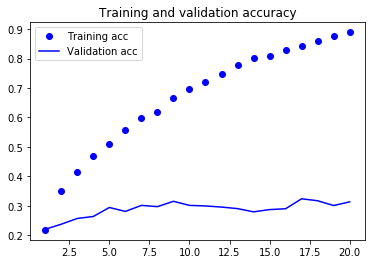

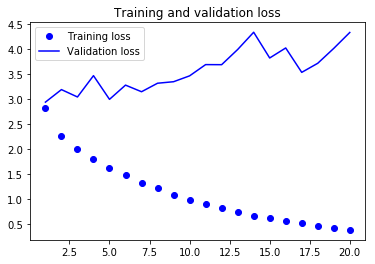

In [36]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
